# K-means Clustering and Dimensionality Reduction on Wine Dataset

## Introduction

In this problem set, we will revisit key clustering and dimensionality reduction techniques using Principal Component Analysis (PCA) and K-means on the Wine dataset. As you work through the notebook, please follow the sequence and address the questions embedded along the way. We’ll explore visualizing the results, interpreting them, and discussing their implications for a hypothetical wine retailer. 

Please keep your written answers to 300 words at max.

### About the Wine Dataset
The Wine dataset is a classic benchmark dataset from the UCI Machine Learning Repository. It contains measurements of 13 chemical properties (such as alcohol content, color intensity, and flavonoids) for wines derived from **three different cultivars grown in the same region of Italy**. For more details, see the UCI Wine Dataset description: https://archive.ics.uci.edu/ml/datasets/wine.

Although the true class labels are provided, **we will treat this as an unsupervised learning problem** and will not use the labels during clustering. They will only be referenced later for interpretation and evaluation.

Let's begin by importing the necessary packages and loading the Wine dataset. 

If you encounter any issues with missing packages, install them by running `%pip install <package_name>`, for example `%pip install matplotlib`. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline
plt.style.use('ggplot')

# Load the Wine dataset
wine_data = load_wine()

df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['label'] = wine_data.target
df.head()

print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## Visualizing Feature Distributions

Before clustering, it is helpful to understand the distribution of each feature in the dataset. 
Here, we plot histograms for all 13 chemical properties of the wines. 

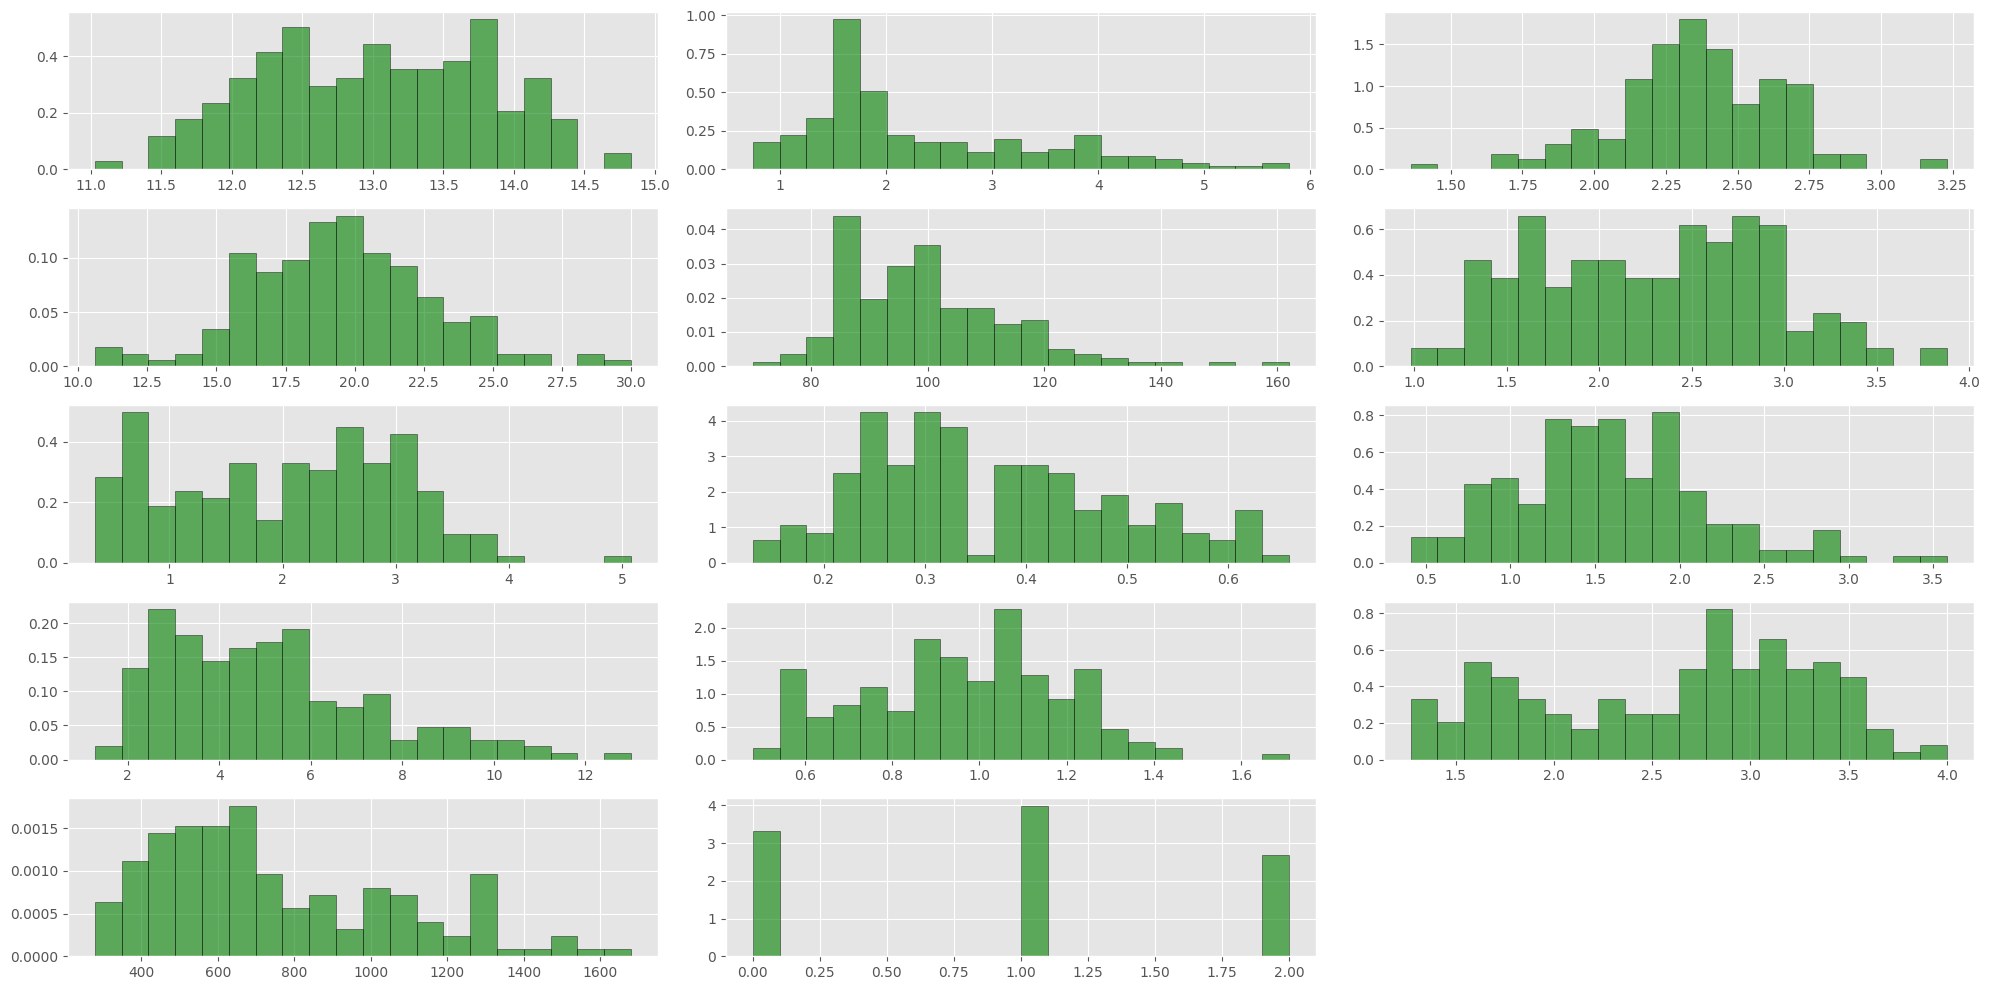

In [9]:
X_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

features = df.columns.to_list()
plt.figure(figsize = (20, 10))
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    plt.hist(df[features[i]], bins=20, color='green', alpha=0.6, edgecolor='black', density=True)
    plt.tight_layout()

Before applying K-means clustering, we need to standardize the data to ensure all features contribute equally to the clustering process.

In [10]:
# Standardize the data
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

## K-means Clustering

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into $k$ clusters. Each observation belongs to the cluster with the nearest mean (centroid). 

K-means clustering can be used in various scenarios, such as customer segmentation in marketing, anomaly detection or document clustering.  In our case, we'll use it to group similar wines together based on their characteristics.

In [11]:
# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_wine_scaled)

### Question 1a (0.5 points)

Produce a scatterplot with a combination of two features from the dataset, colored to show the k-means clusters. Choose a combination of features which shows the three clusters as relatively distinct.

Hint: consider alcohol, malic acid, flavonoids and color intensity

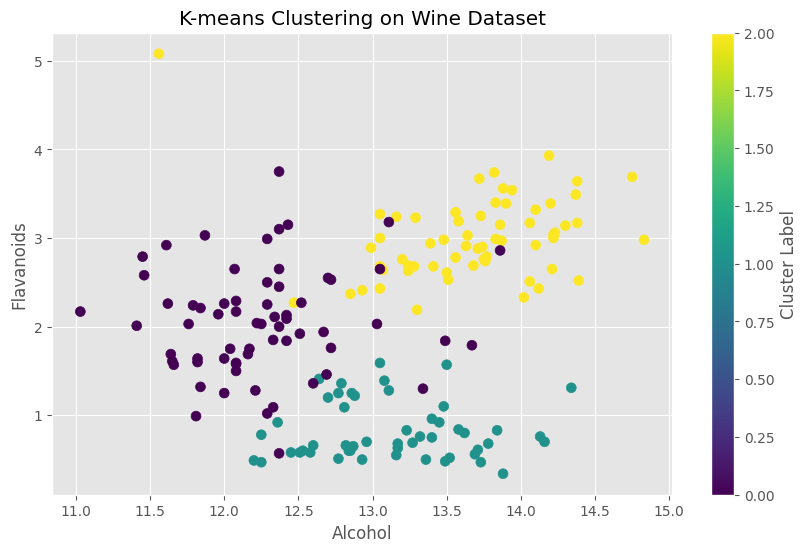

In [12]:
# Choose two features for visualization
feature_1 = 'alcohol'
feature_2 = 'flavanoids'

# Create a scatter plot for the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_wine[feature_1], X_wine[feature_2], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Clustering on Wine Dataset')
plt.xlabel(feature_1.capitalize())
plt.ylabel(feature_2.capitalize())
plt.colorbar(scatter, label='Cluster Label')
plt.show()


### Question 1b (2 points)
Based on the plot, describe the characteristics of each cluster in terms of your features. How well-separated are the clusters?

x: alcohol  
y: flavanoids  

• Cluster with high flavanoids and relatively high alcohol: these wines sit in the upper-right region (high y, mid-to-high x).  
• Cluster with low flavanoids and mid-to-high alcohol: these points are in the lower portion of the plot (low y) but not necessarily low alcohol.  
• Cluster with moderate flavanoids and lower alcohol: these points sit more toward the middle y-range but with comparatively lower alcohol.

Overall, the low-flavanoids cluster is the most clearly separated (vertical separation). The two higher-flavanoids clusters show some overlap, but are more distinguishable when alcohol is considered (one tends to have higher alcohol).


<!-- END QUESTION -->

## Principal Component Analysis (PCA)



Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms data into a new coordinate system. PCA takes a complex, multi-dimensional dataset and finds a simpler way to represent it that still keeps key information. It's often used to visualize high-dimensional data in 2D or 3D plots, reduce noise in data, compress data while minimizing information loss, or prepare data for machine learning algorithms.

Let's apply PCA to our wine dataset and reduce it to 4 dimensions.

Explained variance by PCA components: [0.36198848 0.1920749  0.11123631 0.0706903 ]


[[<matplotlib.axis.XTick at 0x11f118970>,

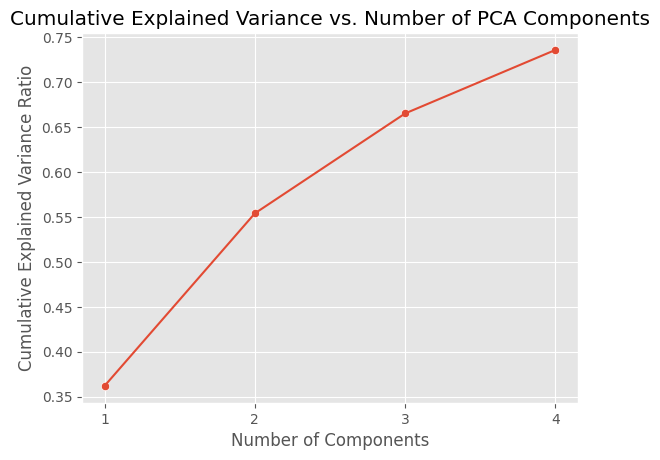

In [13]:
#!pip install seaborn
import seaborn as sns

n_components = 4
pca = PCA(n_components=n_components, random_state=211)
X_pca = pca.fit_transform(X_wine_scaled)

explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PCA components: {explained_variance}')

component_nums = list(range(1, n_components+1))
sns.lineplot(x=component_nums, y=np.cumsum(explained_variance))
ax = sns.scatterplot(x=component_nums, y=np.cumsum(explained_variance))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Cumulative Explained Variance vs. Number of PCA Components')
ax.set(xticks= component_nums)

### Question 2 (0.5 points)

What is the smallest number of components needed to account for 50% of the variance?

In [14]:
n_components_which_account_for_50_percent_variance = int(np.argmax(np.cumsum(explained_variance) >= 0.5) + 1)
print(n_components_which_account_for_50_percent_variance)


2


## K-means Clustering on PCA-reduced Data

Now, let's perform K-means clustering on the PCA-reduced dataset and visualize the results.

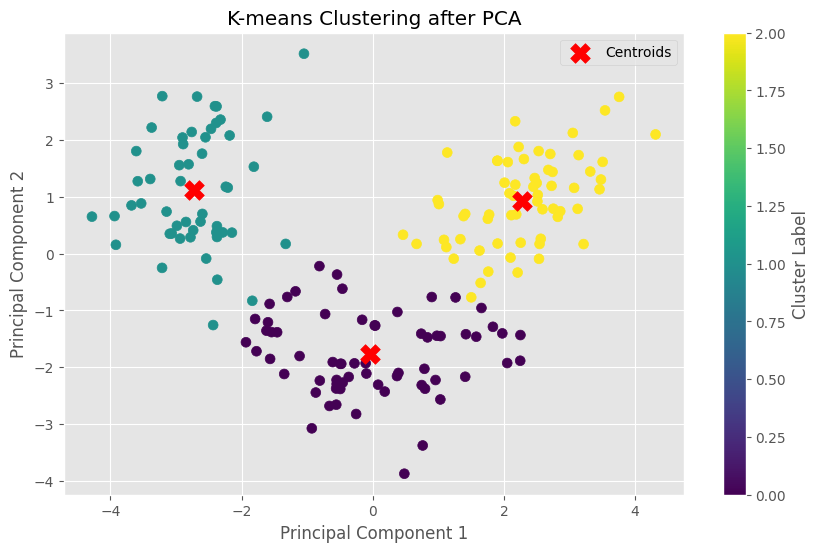

In [15]:
# Perform K-means on the reduced PCA dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca)

# Scatter plot of the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, cmap='viridis', s=50)
plt.title('K-means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')

# Get the centroids of the clusters after PCA
centroids_pca = kmeans_pca.cluster_centers_

# Plot the centroids on the scatter plot. This will help you visualise how seperated the data is around the cluster
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

We're also going to compare the quality of clustering before and after PCA using the silhouette score:

In [16]:
# K-means on the original dataset (without PCA)
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans_original.fit_predict(X_wine_scaled)

# Compare the clustering results
silhouette_pca = silhouette_score(X_pca, kmeans_labels_pca)
silhouette_original = silhouette_score(X_wine_scaled, kmeans_labels_original)

print(f'Silhouette Score after PCA: {silhouette_pca:.4f}')
print(f'Silhouette Score on Original Data: {silhouette_original:.4f}')

Silhouette Score after PCA: 0.4051
Silhouette Score on Original Data: 0.2849


### Question 3 (1 points)
Compare the clustering results before and after PCA. How do they differ? What new observations can you make from the PCA-based clustering? Do the silhouette scores agree with what you see on the plots?

Before PCA (original scaled 13-D space), the clusters are harder to “see” because we can’t visualize all dimensions directly, and points that look close in 2D projections can still differ elsewhere. After PCA, the three groups become more visually interpretable: points tend to form three clouds separated along PC1/PC2, and the centroids appear more spread out.

The silhouette score also improves after PCA, which matches the plots: clusters in PCA space look more compact and better separated. PCA is likely removing noise and emphasizing the dominant axes of variation, which helps K-means find cleaner boundaries.


<!-- END QUESTION -->

## Interpreting PCA Components

### Question 4a (1.5 points)

After performing PCA on the Wine dataset, your goal is to display the top 5 contributing features for Principal Component 1 (PC1) and Principal Component 2 (PC2). Complete the Python program to extract the features that contribute most to each of these principal components.

In [17]:
# Get the PCA component loadings
pca_component_loadings = pd.DataFrame(pca.components_, columns=wine_data.feature_names)
pca_component_loadings

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071


In [18]:
#  Extract the first PC loadings from the DataFrame by indexing it
pc_1 = pca_component_loadings.iloc[0]

# Sort the PC by absolute contribution and take the top 5
top_5_features_pc_1 = pc_1.reindex(pc_1.abs().sort_values(ascending=False).index).head(5)

# Do the same thing for the second PC
pc_2 = pca_component_loadings.iloc[1]
top_5_features_pc_2 = pc_2.reindex(pc_2.abs().sort_values(ascending=False).index).head(5)

print(top_5_features_pc_1)
print(top_5_features_pc_2)


flavanoids                      0.422934
total_phenols                   0.394661
od280/od315_of_diluted_wines    0.376167
proanthocyanins                 0.313429
nonflavanoid_phenols           -0.298533
Name: 0, dtype: float64
color_intensity    0.529996
alcohol            0.483652
proline            0.364903
ash                0.316069
magnesium          0.299634
Name: 1, dtype: float64


### Question 4b (0.5 points)

What do the positive and negative contributions signify?

A loading is the weight a feature has in forming a principal component.

A positive or negative loading does not indicate whether a feature is good or bad. Instead, it indicates the direction of the feature’s contribution to a principal component. Features with opposite signs on the same principal component are being contrasted against each other, meaning the component separates observations along that dimension. The magnitude of the loading shows how strongly the feature contributes to the principal component.


## Application to Wine Retail

### Question 5a (1 points)
Based on the K-means clustering results and the PCA analysis, identify two features you would choose to create distinct sections in your wine store. Justify your selection and explain how you would use these features to create distinct sections in the store. Consider how clustering and data visualization can guide organizational decisions. This is a key aspect of data science — not only extracting insights from data but also applying them in a practical, business-oriented context.

I would use (1) flavanoids and (2) color intensity to create store sections.

Flavanoids shows up as a top contributor to PC1 and also separates K-means clusters well. Color intensity is a top contributor to PC2 and helps distinguish another axis of variation that customers can understand visually.

In the store, I’d create a 2D organization:
- Primary aisle/section split by color intensity (light → medium → deep/bold).
- Within each color band, subdivide by flavanoids (lower → higher) to group wines with similar structure/tannin-like characteristics.

This mirrors what clustering and PCA suggests: these two features capture much of the separation between groups, making the layout both data-driven and easy to explain to customers.


### Question 5b (0.5 points) 
Do you see any outliers in the K-means result? What do they signify? What would you do about these in a similar context to wine selling? 

Yes, there are a few outliers far from their cluster’s main cloud. 

I would first test those products to see if there were any deficiencies causing this problem. If there was not deficiency, I would promote these products as niche types that didn't fit the main typess. I would then label them as “specialty/rare” and merchandise separately.


## Final Questions

### Question 6 (0 points)

Did you use an LLM like ChatGPT or Claude to assist in answering this problem set?

Write "No" if you did not.
Write "Yes" and paste a link to the transcript  (e.g. https://chat.openai.com/share/5c14a304-1b7f-4fb9-b400-21e65ad545bb ) if you did.

No. I used LLM to help me understand relevant concepts and knowledge, but not directly on this notebook.


### Question 7 (0 points)

Please use the link below to provide feedback on how well the assignment aligned with the concepts covered in class. Your input will help us improve and refine future assignments. 

Form Link - https://forms.gle/LtPwzFayDMUyBcay6

Did you fill out the feedback form? 

Yes.


## Submission Instructions

When you have completed the problem set, please submit a **PDF version of your notebook** with all outputs visible.  

- **If using DataHub:** Go to `File > Save and Export Notebook As > PDF` to generate your PDF.  
- **Alternative option:** You may use online tools to convert your notebook to a readable PDF, for example [Vertopal](https://www.vertopal.com/).  

Before uploading your PDF to bCourses, **double-check** that all code outputs, figures, and answers are visible and correct. Submissions with missing outputs may not receive full credit.